In [201]:
import pandas as pd
from plotnine import *
import numpy as np
import requests
from bs4 import BeautifulSoup

# PART 1 
## Environmental fines from 2000 to 2021 / Source: https://servicos.ibama.gov.br/ctf/publico/areasembargadas/ConsultaPublicaAreasEmbargadas.php (I have downloaded each year separetely)

In [203]:
# df1 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2022.csv')
df2 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2021.csv')
df3 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2020.csv')
df4 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2019.csv')
df5 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2018.csv')
df6 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2017.csv')
df7 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2016.csv')
df8 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2015.csv')
df9 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2014.csv')
df10 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2013.csv')
df11 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2012.csv')
df12 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2011.csv')
df13 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2010.csv')
df14 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2009.csv')
df15 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2008.csv')
df16 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2007.csv')
df17 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2006.csv')
df18 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2005.csv')
df19 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2004.csv')
df20 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2003.csv')
df21 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2002.csv')
df22 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2001.csv')
df23 = pd.read_csv('autuacoes_pelo_site_10_abril_22/2000.csv')

In [204]:
# concat

df_aut_ffox = pd.concat([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23])


df_aut_ffox.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476337 entries, 0 to 25561
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Nº                 476337 non-null  int64 
 1   Tipo Infracao      476337 non-null  object
 2   Data Infração      476337 non-null  object
 3   Bioma              203694 non-null  object
 4   Estado             476337 non-null  object
 5   Município          476337 non-null  object
 6   CPF ou CNPJ        473445 non-null  object
 7   Nome Autuado       476337 non-null  object
 8   Nº A.I.            476337 non-null  object
 9   Série A.I.         448796 non-null  object
 10  Valor Multa        476278 non-null  object
 11  Nº Processo        467167 non-null  object
 12  Status Débito      476337 non-null  object
 13  Sanções Aplicadas  362906 non-null  object
dtypes: int64(1), object(13)
memory usage: 54.5+ MB


In [205]:
# fixing columns names
df_aut_ffox.columns = df_aut_ffox.columns.str.lower().str.replace(' ', '_')
df_aut_ffox.columns = df_aut_ffox.columns.str.replace('º', '')
df_aut_ffox.columns = df_aut_ffox.columns.str.replace('í', 'i')
df_aut_ffox.columns = df_aut_ffox.columns.str.replace('ã', 'a')
df_aut_ffox.columns = df_aut_ffox.columns.str.replace('é', 'e')
df_aut_ffox.columns = df_aut_ffox.columns.str.replace('ç', 'c')
df_aut_ffox.columns = df_aut_ffox.columns.str.replace('õ', 'o')
df_aut_ffox.columns = df_aut_ffox.columns.str.replace('a.i.', 'ai')
df_aut_ffox.columns = df_aut_ffox.columns.str.replace('dataifracao', 'data_infracao')


df_aut_ffox

/var/folders/dj/5c61qy0d0b9gcj0yrt1jd2300000gn/T/ipykernel_13968/3595526261.py:9: FutureWarning: The default value of regex will change from True to False in a future version.


,n,tipo_infracao,data_infracao,bioma,estado,municipio,cpf_ou_cnpj,nome_autuado,n_ai,serie_ai,valor_multa,n_processo,status_debito,sancoes_aplicadas
0,1182,Unidade de Conservação,23/11/2021,Amazonia,AC,Assis Brasil,020.173.385-40,Antonio Silva Ferreira,CMK25XMW,NaN,"10000,00",NaN,Lavrado,Vanda de terra pública no interior da Reserva ...
1,1677,Unidade de Conservação,28/10/2021,Amazonia,AC,Assis Brasil,565.533.902-15,Jose Ferreira do Nascimento Filho,YPKH5SWK,NaN,"5000,00",NaN,Lavrado,Realizar venda de terras no interior da RESEX ...
2,1181,Flora,23/11/2021,Amazonia,AC,Assis Brasil,984.031.332-00,Josimar Estevão Dos Santos,S16UT1KO,NaN,"70000,00",NaN,Lavrado,"Destruir 6,76 hectares de Floresta nativa no i..."
3,386,Flora,25/06/2021,Amazonia,AC,Assis Brasil,015.403.112-79,Leandro Ferreira Barros,89ZQKCE5,NaN,"270000,00",NaN,Lavrado,"Destruir 26,83 hectares de Floresta nativa no ..."
4,1345,Unidade de Conservação,17/11/2021,Amazonia,AC,Assis Brasil,121.665.547-25,Mauricione Martins,64NHPPVV,NaN,"10000,00",NaN,Lavrado,Realizar quaisquer atividade ou adotar conduta...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25557,17820,Controle ambiental,22/09/2000,NaN,TOCANTINS,XAMBIOA,00.334.681/0001-24,MINERAÇÃO VALE DO ARAGUAIA LTDA.,193228,D,"70000,00",02029.003861/2000-65,Ajuizado,"63 25 Lei, 9605/98, 50 2º Decreto, 3179/1999, ..."
25558,17824,Controle ambiental,19/12/2000,NaN,TOCANTINS,XAMBIOA,00.334.681/0001-24,MINERAÇÃO VALE DO ARAGUAIA LTDA.,193856,D,"1500,00",02029.004103/2001-45,Quitado. Baixa automática,NaN
25559,4773,Flora,12/09/2000,NaN,TOCANTINS,XAMBIOA,372.000.542-91,NEUZA XAVIER DA SILVA CHAVES,191467,D,"50,00",02029.003705/2000-02,Cancelado,NaN
25560,20918,Flora,23/08/2000,NaN,TOCANTINS,XAMBIOA,283.209.302-78,VALDENOR CARDOSO DOS SANTOS,191699,D,"200,00",02029.003236/2000-13,Excluído devido a duplicidade de lançamento,NaN


In [206]:
#datetime and year column
df_aut_ffox.data_infracao = pd.to_datetime(df_aut_ffox.data_infracao)
df_aut_ffox.info()
df_aut_ffox['ano'] = pd.DatetimeIndex(df_aut_ffox['data_infracao']).year

df_aut_ffox.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476337 entries, 0 to 25561
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   n                  476337 non-null  int64         
 1   tipo_infracao      476337 non-null  object        
 2   data_infracao      476337 non-null  datetime64[ns]
 3   bioma              203694 non-null  object        
 4   estado             476337 non-null  object        
 5   municipio          476337 non-null  object        
 6   cpf_ou_cnpj        473445 non-null  object        
 7   nome_autuado       476337 non-null  object        
 8   n_ai               476337 non-null  object        
 9   serie_ai           448796 non-null  object        
 10  valor_multa        476278 non-null  object        
 11  n_processo         467167 non-null  object        
 12  status_debito      476337 non-null  object        
 13  sancoes_aplicadas  362906 non-null  object   

,n,tipo_infracao,data_infracao,bioma,estado,municipio,cpf_ou_cnpj,nome_autuado,n_ai,serie_ai,valor_multa,n_processo,status_debito,sancoes_aplicadas,ano
0,1182,Unidade de Conservação,2021-11-23,Amazonia,AC,Assis Brasil,020.173.385-40,Antonio Silva Ferreira,CMK25XMW,NaN,"10000,00",NaN,Lavrado,Vanda de terra pública no interior da Reserva ...,2021
1,1677,Unidade de Conservação,2021-10-28,Amazonia,AC,Assis Brasil,565.533.902-15,Jose Ferreira do Nascimento Filho,YPKH5SWK,NaN,"5000,00",NaN,Lavrado,Realizar venda de terras no interior da RESEX ...,2021
2,1181,Flora,2021-11-23,Amazonia,AC,Assis Brasil,984.031.332-00,Josimar Estevão Dos Santos,S16UT1KO,NaN,"70000,00",NaN,Lavrado,"Destruir 6,76 hectares de Floresta nativa no i...",2021
3,386,Flora,2021-06-25,Amazonia,AC,Assis Brasil,015.403.112-79,Leandro Ferreira Barros,89ZQKCE5,NaN,"270000,00",NaN,Lavrado,"Destruir 26,83 hectares de Floresta nativa no ...",2021
4,1345,Unidade de Conservação,2021-11-17,Amazonia,AC,Assis Brasil,121.665.547-25,Mauricione Martins,64NHPPVV,NaN,"10000,00",NaN,Lavrado,Realizar quaisquer atividade ou adotar conduta...,2021


In [207]:
# save a csv copy
df_aut_ffox.to_csv('autos_ibama_2000_2021.csv', index=False)

In [232]:
#unique serial number combining n, n_ai and year (ano)
df_aut_ffox['n_and_n_ai_and_year'] = df_aut_ffox.n.astype(str) + df_aut_ffox.n_ai.astype(str) + df_aut_ffox.ano.astype(str)
df_aut_ffox.head(5)


,n,tipo_infracao,data_infracao,bioma,estado,municipio,cpf_ou_cnpj,nome_autuado,n_ai,serie_ai,valor_multa,n_processo,status_debito,sancoes_aplicadas,ano,n_and_n_ai_and_year
0,1182,Unidade de Conservação,2021-11-23,Amazonia,AC,Assis Brasil,020.173.385-40,Antonio Silva Ferreira,CMK25XMW,NaN,"10000,00",NaN,Lavrado,Vanda de terra pública no interior da Reserva ...,2021,1182CMK25XMW2021
1,1677,Unidade de Conservação,2021-10-28,Amazonia,AC,Assis Brasil,565.533.902-15,Jose Ferreira do Nascimento Filho,YPKH5SWK,NaN,"5000,00",NaN,Lavrado,Realizar venda de terras no interior da RESEX ...,2021,1677YPKH5SWK2021
2,1181,Flora,2021-11-23,Amazonia,AC,Assis Brasil,984.031.332-00,Josimar Estevão Dos Santos,S16UT1KO,NaN,"70000,00",NaN,Lavrado,"Destruir 6,76 hectares de Floresta nativa no i...",2021,1181S16UT1KO2021
3,386,Flora,2021-06-25,Amazonia,AC,Assis Brasil,015.403.112-79,Leandro Ferreira Barros,89ZQKCE5,NaN,"270000,00",NaN,Lavrado,"Destruir 26,83 hectares de Floresta nativa no ...",2021,38689ZQKCE52021
4,1345,Unidade de Conservação,2021-11-17,Amazonia,AC,Assis Brasil,121.665.547-25,Mauricione Martins,64NHPPVV,NaN,"10000,00",NaN,Lavrado,Realizar quaisquer atividade ou adotar conduta...,2021,134564NHPPVV2021


In [242]:
# remove duplicates
autuacao_unicos = df_aut_ffox.copy()
autuacao_unicos = autuacao_unicos.drop_duplicates(subset=['n_and_n_ai_and_year'])
autuacao_unicos.head(5)

,n,tipo_infracao,data_infracao,bioma,estado,municipio,cpf_ou_cnpj,nome_autuado,n_ai,serie_ai,valor_multa,n_processo,status_debito,sancoes_aplicadas,ano,n_and_n_ai_and_year
0,1182,Unidade de Conservação,2021-11-23,Amazonia,AC,Assis Brasil,020.173.385-40,Antonio Silva Ferreira,CMK25XMW,NaN,"10000,00",NaN,Lavrado,Vanda de terra pública no interior da Reserva ...,2021,1182CMK25XMW2021
1,1677,Unidade de Conservação,2021-10-28,Amazonia,AC,Assis Brasil,565.533.902-15,Jose Ferreira do Nascimento Filho,YPKH5SWK,NaN,"5000,00",NaN,Lavrado,Realizar venda de terras no interior da RESEX ...,2021,1677YPKH5SWK2021
2,1181,Flora,2021-11-23,Amazonia,AC,Assis Brasil,984.031.332-00,Josimar Estevão Dos Santos,S16UT1KO,NaN,"70000,00",NaN,Lavrado,"Destruir 6,76 hectares de Floresta nativa no i...",2021,1181S16UT1KO2021
3,386,Flora,2021-06-25,Amazonia,AC,Assis Brasil,015.403.112-79,Leandro Ferreira Barros,89ZQKCE5,NaN,"270000,00",NaN,Lavrado,"Destruir 26,83 hectares de Floresta nativa no ...",2021,38689ZQKCE52021
4,1345,Unidade de Conservação,2021-11-17,Amazonia,AC,Assis Brasil,121.665.547-25,Mauricione Martins,64NHPPVV,NaN,"10000,00",NaN,Lavrado,Realizar quaisquer atividade ou adotar conduta...,2021,134564NHPPVV2021


# Question: how many fines have been applied year by year?

<AxesSubplot:xlabel='data_infracao'>

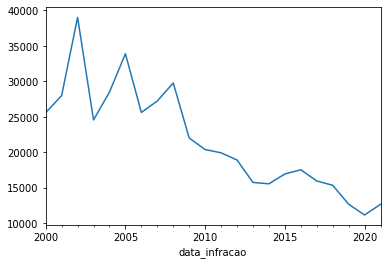

In [243]:
# fines trend
autuacao_unicos.resample('Y', on='data_infracao').size().plot()


In [274]:
# number of fines, year by year
numero_autuacoes_por_ano = autuacao_unicos.resample('Y', on='data_infracao').size().reset_index()

# save a csv 
numero_autuacoes_por_ano.to_csv('num_autuacoes_ano.csv', index=False)

numero_autuacoes_por_ano


,data_infracao,0
0,2000-12-31,25562
1,2001-12-31,27969
2,2002-12-31,39002
3,2003-12-31,24530
4,2004-12-31,28461
5,2005-12-31,33866
6,2006-12-31,25590
7,2007-12-31,27202
8,2008-12-31,29743
9,2009-12-31,21985


# Question: How much money is being charged by Ibama?

In [244]:
# fix fine values 
autuacao_unicos.valor_multa = autuacao_unicos.valor_multa.str.replace(',', '.')
autuacao_unicos.valor_multa = autuacao_unicos.valor_multa.astype(float)
autuacao_unicos.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 476336 entries, 0 to 25561
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   n                    476336 non-null  int64         
 1   tipo_infracao        476336 non-null  object        
 2   data_infracao        476336 non-null  datetime64[ns]
 3   bioma                203693 non-null  object        
 4   estado               476336 non-null  object        
 5   municipio            476336 non-null  object        
 6   cpf_ou_cnpj          473444 non-null  object        
 7   nome_autuado         476336 non-null  object        
 8   n_ai                 476336 non-null  object        
 9   serie_ai             448796 non-null  object        
 10  valor_multa          476277 non-null  float64       
 11  n_processo           467166 non-null  object        
 12  status_debito        476336 non-null  object        
 13  sancoes_aplicad

In [245]:
# fines counts, mean, etc...
pd.options.display.float_format = '{:.2f}'.format #remove scientific notation by removing decimals
autuacao_unicos.valor_multa.describe()

count      476277.00
mean       119440.40
std       1182897.97
min             0.00
25%          1100.00
50%          3900.00
75%         17000.00
max     169910865.00
Name: valor_multa, dtype: float64

<AxesSubplot:xlabel='ano'>

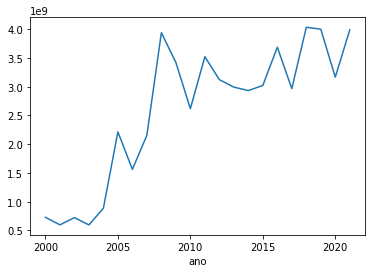

In [246]:
# total applied fines in BRL / R$ / Brazilian reals 
autuacao_unicos.groupby('ano').valor_multa.sum().plot()

In [247]:
valor_multas_aplicadas_por_ano = autuacao_unicos.groupby('ano').valor_multa.sum().reset_index()
valor_multas_aplicadas_por_ano

,ano,valor_multa
0,2000,728739872.34
1,2001,597443016.39
2,2002,723296915.23
3,2003,596315925.84
4,2004,886142631.21
5,2005,2215028360.57
6,2006,1562708730.50
7,2007,2155313318.72
8,2008,3939070236.86
9,2009,3422994191.64


In [318]:
# save the data
valor_multas_aplicadas_por_ano.to_csv('valor_multas_aplicadas_por_ano.csv', index=False)

In [ ]:
# Fines by biome

In [252]:
autuacao_unicos.bioma.value_counts()

Amazonia              77658
Mata Atlantica        44651
Cerrado               30703
Caatinga              25509
Costeiro e Marinho    19442
Pampa                  4764
Pantanal                966
Name: bioma, dtype: int64

<AxesSubplot:xlabel='data_infracao'>

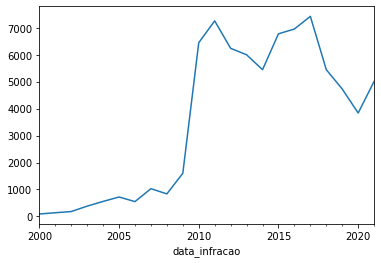

In [254]:
# Fines by year - Amazon
autuacao_unicos[autuacao_unicos.bioma == 'Amazonia'].resample('Y', on='data_infracao').size().plot()

In [253]:
# Fines by year - Amazon

autuacao_unicos[autuacao_unicos.bioma == 'Amazonia'].resample('Y', on='data_infracao').size()

data_infracao
2000-12-31      88
2001-12-31     135
2002-12-31     179
2003-12-31     380
2004-12-31     555
2005-12-31     719
2006-12-31     549
2007-12-31    1029
2008-12-31     835
2009-12-31    1600
2010-12-31    6449
2011-12-31    7260
2012-12-31    6240
2013-12-31    6001
2014-12-31    5447
2015-12-31    6779
2016-12-31    6957
2017-12-31    7428
2018-12-31    5447
2019-12-31    4729
2020-12-31    3838
2021-12-31    5014
Freq: A-DEC, dtype: int64

<AxesSubplot:>

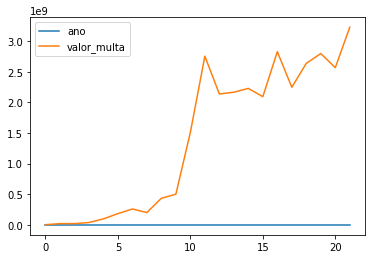

In [256]:
autuacao_unicos[autuacao_unicos.bioma == 'Amazonia'].groupby('ano').valor_multa.sum().reset_index().plot()

In [257]:
autuacao_unicos[autuacao_unicos.bioma == 'Amazonia'].groupby('ano').valor_multa.sum().reset_index()

,ano,valor_multa
0,2000,3235105.50
1,2001,21509089.17
2,2002,21256230.58
3,2003,38488754.74
4,2004,98525837.33
5,2005,183488057.30
6,2006,259821051.88
7,2007,202316439.11
8,2008,434716469.06
9,2009,500974543.15


In [275]:
autuacao_unicos[autuacao_unicos.bioma == 'Mata Atlantica'].resample('Y', on='data_infracao').size()

data_infracao
2000-12-31      91
2001-12-31     114
2002-12-31     136
2003-12-31     170
2004-12-31     414
2005-12-31     479
2006-12-31     285
2007-12-31     246
2008-12-31     352
2009-12-31     718
2010-12-31    3959
2011-12-31    4702
2012-12-31    4405
2013-12-31    3384
2014-12-31    3062
2015-12-31    3408
2016-12-31    3702
2017-12-31    3369
2018-12-31    3726
2019-12-31    2672
2020-12-31    2394
2021-12-31    2863
Freq: A-DEC, dtype: int64

<AxesSubplot:xlabel='data_infracao'>

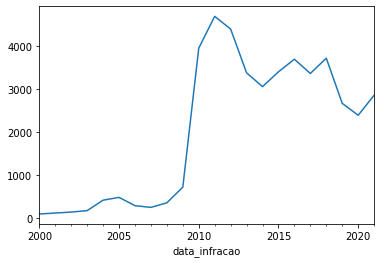

In [276]:
autuacao_unicos[autuacao_unicos.bioma == 'Mata Atlantica'].resample('Y', on='data_infracao').size().plot()

In [277]:
autuacao_unicos[autuacao_unicos.bioma == 'Cerrado'].resample('Y', on='data_infracao').size()

data_infracao
2000-12-31      56
2001-12-31      57
2002-12-31     111
2003-12-31     112
2004-12-31     196
2005-12-31     324
2006-12-31     214
2007-12-31     172
2008-12-31     220
2009-12-31     499
2010-12-31    3240
2011-12-31    3466
2012-12-31    2954
2013-12-31    2618
2014-12-31    2882
2015-12-31    2924
2016-12-31    2142
2017-12-31    1670
2018-12-31    2239
2019-12-31    1570
2020-12-31    1811
2021-12-31    1226
Freq: A-DEC, dtype: int64

<AxesSubplot:xlabel='data_infracao'>

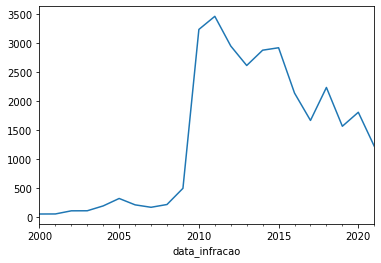

In [278]:
autuacao_unicos[autuacao_unicos.bioma == 'Cerrado'].resample('Y', on='data_infracao').size().plot()

In [260]:
# state where fines are being applied
autuacao_unicos.estado.value_counts()

MINAS GERAIS           72941
PARA                   46475
MATO GROSSO            35750
RONDONIA               28687
CEARA                  22696
GOIAS                  22682
ESPIRITO SANTO         20556
RIO GRANDE DO SUL      18716
SAO PAULO              18267
BAHIA                  18020
SANTA CATARINA         17680
AMAZONAS               17017
MATO GROSSO DO SUL     14599
RIO DE JANEIRO         12914
MARANHAO               12112
PARANA                 12041
RIO GRANDE DO NORTE    11124
TOCANTINS              10929
PARAIBA                10102
PERNAMBUCO              8240
PIAUI                   7019
ACRE                    6366
ALAGOAS                 6003
RORAIMA                 5962
DISTRITO FEDERAL        4519
AMAPA                   4146
SERGIPE                 2955
PA                      1066
RJ                       899
SP                       699
RS                       627
CE                       580
RO                       459
AM                       437
SC            

In [264]:
# cities with the most fined companies/people
autuacao_unicos.municipio.value_counts().head(10)

PORTO VELHO       7155
BELO HORIZONTE    5790
FORTALEZA         5737
BELEM             5241
BRASILIA          4476
RIO DE JANEIRO    3907
ALTAMIRA          3308
VILHENA           3122
NOVO PROGRESSO    3114
CUIABA            3098
Name: municipio, dtype: int64

# PART 2
## Paid environmental fines / source: https://dadosabertos.ibama.gov.br/dados/SICAFI/AL/Arrecadacao/arrecadacaobenstutelados.csv
[each Brazilian has a link, so we need to create one csv for state]

In [33]:
# this code will allow me to import the csvs files later
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

In [13]:
# one csv per state
states = ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']

len(states)

27

In [48]:

for state in states:
    print(f'df_' + state +  ' = pd.read_csv("' + 'http://dadosabertos.ibama.gov.br/dados/SICAFI/'+ state + '/Arrecadacao/arrecadacaobenstutelados.csv"'  + ', sep=";")')
    
    

df_AC = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/AC/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_AL = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/AL/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_AM = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/AM/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_AP = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/AP/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_BA = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/BA/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_CE = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/CE/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_DF = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/DF/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_ES = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/ES/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_GO = pd.read_csv("htt

In [50]:
# one variable per state
df_AC = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/AC/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_AL = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/AL/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_AM = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/AM/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_AP = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/AP/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_BA = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/BA/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_CE = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/CE/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_DF = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/DF/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_ES = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/ES/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_GO = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/GO/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_MA = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/MA/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_MT = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/MT/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_MS = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/MS/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_MG = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/MG/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_PA = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/PA/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_PB = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/PB/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_PR = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/PR/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_PE = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/PE/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_PI = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/PI/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_RJ = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/RJ/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_RN = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/RN/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_RS = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/RS/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_RO = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/RO/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_RR = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/RR/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_SC = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/SC/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_SP = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/SP/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_SE = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/SE/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")
df_TO = pd.read_csv("http://dadosabertos.ibama.gov.br/dados/SICAFI/TO/Arrecadacao/arrecadacaobenstutelados.csv", sep=";")

In [153]:
# concatenate csvs for a final paid fines dataframe

arrecadacao = pd.concat([df_AC, df_AL, df_AM, df_AP, df_BA, df_CE, df_DF, df_ES, df_GO, df_MA, df_MT, df_MS, df_MG, df_PA, df_PB, df_PR, df_PE, df_PI, df_RJ, df_RN, df_RS, df_RO, df_RR, df_SC, df_SP, df_SE, df_TO])

arrecadacao

arrecadacao.to_csv('arrecadacao.csv', index=False)


In [281]:
# if you don't want to download all the data again, I have saved a csv with everything)
arrecadacao_saved = pd.read_csv('arrecadacao.csv')
arrecadacao_saved

,Nº AI,Nome ou Razão Social,CPF/CNPJ,UF,Município,Status Débito,Tipo Auto,Tipo Infração,Enquadramento Legal,Data Auto,Valor do Auto,Moeda,Parcela,Quantidade de Parcelas,Valor (Base) da Parcela,Valor Pago,Data Pagamento,Última Atualização Relatório
0,11175 - D,PAULO COUTO CABRAL,363.359.919-34,AC,RIO BRANCO,Quitado. Baixa automática,Multa,Flora,NaN,31/08/1998,1240.00,Real,1,1,1240,"305,04",02/12/1998,14/04/2022 19:00
1,112481 - D,OURO BRANCO MADEIRAS IMP. E EXP. LTDA.,00.525.034/0001-08,AC,CAPIXABA,Quitado. Baixa automática,Multa,Flora,NaN,20/01/2003,5588.04,Real,1,1,"5588,04","3854,31",11/09/2003,14/04/2022 19:00
2,11255 - D,SINÉZIO JOSÉ FALCÃO,139.287.402-53,AC,ACRELANDIA,Parcelado pela 1ª vez,Multa,Flora,NaN,04/09/1998,500.00,Real,1,12,"68,93","73,35",22/03/2000,14/04/2022 19:00
3,11256 - D,RONDOBRAS AUTO PECAS IMP. E EXP. LTDA,10.213.890/0001-73,AC,ACRELANDIA,Quitado. Baixa automática,Multa,Flora,NaN,10/09/1998,3000.00,Real,1,10,"354,99","341,19",20/10/1998,14/04/2022 19:00
4,11256 - D,RONDOBRAS AUTO PECAS IMP. E EXP. LTDA,10.213.890/0001-73,AC,ACRELANDIA,Quitado. Baixa automática,Multa,Flora,NaN,10/09/1998,3000.00,Real,2,10,349,"335,42",20/11/1998,14/04/2022 19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356757,VC54YC28 -,FERNANDO JOSE PEREIRA BARROS,015.633.671-57,TO,ARAPOEMA,Parcelamento Decreto 9.760/19,Multa,Flora,"Decreto 6514/2008 - Artigo 3, Lei 9605/98 - Ar...",07/11/2019,5000.00,Real,9,60,"64,4","64,4",18/01/2022,14/04/2022 19:11
1356758,VC54YC28 -,FERNANDO JOSE PEREIRA BARROS,015.633.671-57,TO,ARAPOEMA,Parcelamento Decreto 9.760/19,Multa,Flora,"Decreto 6514/2008 - Artigo 3, Lei 9605/98 - Ar...",07/11/2019,5000.00,Real,10,60,"64,84","64,84",21/02/2022,14/04/2022 19:11
1356759,VC54YC28 -,FERNANDO JOSE PEREIRA BARROS,015.633.671-57,TO,ARAPOEMA,Parcelamento Decreto 9.760/19,Multa,Flora,"Decreto 6514/2008 - Artigo 3, Lei 9605/98 - Ar...",07/11/2019,5000.00,Real,11,60,"65,31","65,31",21/03/2022,14/04/2022 19:11
1356760,YZQDT31Q -,AGROBRAZIL AGROPECUARIA LTDA,97.549.041/0001-73,TO,TOCANTINIA,Para homologação/prazo de defesa,Multa,Controle ambiental,Decreto 6514/2008 - Artigo 64,20/11/2020,17540.00,Real,1,1,17540,12278,07/06/2021,14/04/2022 19:11


In [282]:
# check if we got all the brazilian states
len(arrecadacao_saved.UF.unique())

27

In [284]:
arrecadacao_saved.UF.unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT',
       'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO',
       'RR', 'SC', 'SP', 'SE', 'TO'], dtype=object)

In [285]:
arrecadacao_saved.UF.value_counts()

MG    208514
GO     94472
SC     87621
PA     76563
CE     71089
ES     70901
BA     61616
MT     59424
PB     57509
RO     57118
SP     54781
RS     54401
TO     54339
RN     46400
PR     44436
MS     40459
MA     30703
RJ     29621
PE     29156
AM     28530
PI     22205
AL     17222
AC     14702
DF     14174
RR     12874
SE      9924
AP      8008
Name: UF, dtype: int64

In [287]:
# fixing columns
arrecadacao.columns = arrecadacao.columns.str.lower().str.replace(' ', '_')
arrecadacao.columns = arrecadacao.columns.str.lower().str.replace(' ', '_')
arrecadacao.columns = arrecadacao.columns.str.replace('º', '')
arrecadacao.columns = arrecadacao.columns.str.replace('í', 'i')
arrecadacao.columns = arrecadacao.columns.str.replace('ã', 'a')
arrecadacao.columns = arrecadacao.columns.str.replace('ç', 'c')
arrecadacao.columns = arrecadacao.columns.str.replace('õ', 'o')
arrecadacao.columns = arrecadacao.columns.str.replace('a.i.', 'ai')
arrecadacao.columns = arrecadacao.columns.str.replace('/', '_')
arrecadacao.columns = arrecadacao.columns.str.replace('(', '')
arrecadacao.columns = arrecadacao.columns.str.replace(')', '')
arrecadacao.columns = arrecadacao.columns.str.replace('ú', 'u')
arrecadacao.columns = arrecadacao.columns.str.replace('ó', 'o')
arrecadacao.columns = arrecadacao.columns.str.replace('ultima_atuaiacao_relatorio', 'ultima_atualizacao_relatorio')
arrecadacao.head(5)

/var/folders/dj/5c61qy0d0b9gcj0yrt1jd2300000gn/T/ipykernel_13968/3114915371.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
/var/folders/dj/5c61qy0d0b9gcj0yrt1jd2300000gn/T/ipykernel_13968/3114915371.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
/var/folders/dj/5c61qy0d0b9gcj0yrt1jd2300000gn/T/ipykernel_13968/3114915371.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


,n_ai,nome_ou_razao_social,cpf_cnpj,uf,municipio,status_débito,tipo_auto,tipo_infracao,enquadramento_legal,data_auto,valor_do_auto,moeda,parcela,quantidade_de_parcelas,valor_base_da_parcela,valor_pago,data_pagamento,ultima_atualizacao_relatorio,ano_auto,ano_pagamento,anos_para_pagar
1,112481 - D,OURO BRANCO MADEIRAS IMP. E EXP. LTDA.,00.525.034/0001-08,AC,CAPIXABA,Quitado. Baixa automática,Multa,Flora,NaN,2003-01-20,5588.04,Real,1,1,"5588,04",3854.31,2003-11-09,14/04/2022 19:00,2003,2003.00,0.00
338,201746 - D,MADEIREIRA NORTE BRASILEIRO LTDA,04.511.291/0001-33,AC,CRUZEIRO DO SUL,Quitado. Cancelado o saldo devedor,Multa,Flora,NaN,2001-04-20,200.00,Real,1,1,200,214.94,2001-05-15,14/04/2022 19:00,2001,2001.00,0.00
435,201857 - D,FRANCISCO ORLEIR FORTUNATO DA SILVA,322.682.382-53,AC,CRUZEIRO DO SUL,Quitado. Baixa automática,Multa,Ecossistema,NaN,2001-08-02,300.00,Real,1,5,"74,05",74.05,2001-05-30,14/04/2022 19:00,2001,2001.00,0.00
436,201857 - D,FRANCISCO ORLEIR FORTUNATO DA SILVA,322.682.382-53,AC,CRUZEIRO DO SUL,Quitado. Baixa automática,Multa,Ecossistema,NaN,2001-08-02,300.00,Real,2,5,"74,05",82.20,2001-10-07,14/04/2022 19:00,2001,2001.00,0.00
437,201857 - D,FRANCISCO ORLEIR FORTUNATO DA SILVA,322.682.382-53,AC,CRUZEIRO DO SUL,Quitado. Baixa automática,Multa,Ecossistema,NaN,2001-08-02,300.00,Real,3,5,"74,05",82.94,2001-10-08,14/04/2022 19:00,2001,2001.00,0.00


In [295]:
len(arrecadacao)

1091723

In [296]:
# fix date columns
arrecadacao.data_pagamento = pd.to_datetime(arrecadacao.data_pagamento, errors = 'coerce')
arrecadacao.data_auto = pd.to_datetime(arrecadacao.data_auto, errors = 'coerce')

arrecadacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091723 entries, 1 to 54338
Data columns (total 21 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   n_ai                          1091723 non-null  object        
 1   nome_ou_razao_social          1091723 non-null  object        
 2   cpf_cnpj                      1091003 non-null  object        
 3   uf                            1091723 non-null  object        
 4   municipio                     1091723 non-null  object        
 5   status_débito                 1091723 non-null  object        
 6   tipo_auto                     1091723 non-null  object        
 7   tipo_infracao                 1091723 non-null  object        
 8   enquadramento_legal           892562 non-null   object        
 9   data_auto                     1091723 non-null  datetime64[ns]
 10  valor_do_auto                 1091723 non-null  float64       
 11  

In [297]:
# add year columns and time to pay
arrecadacao['ano_auto'] = pd.DatetimeIndex(arrecadacao['data_auto']).year
arrecadacao['ano_pagamento'] = pd.DatetimeIndex(arrecadacao['data_pagamento']).year
arrecadacao['anos_para_pagar'] = arrecadacao.ano_pagamento - arrecadacao.ano_auto

arrecadacao.head(5)

,n_ai,nome_ou_razao_social,cpf_cnpj,uf,municipio,status_débito,tipo_auto,tipo_infracao,enquadramento_legal,data_auto,valor_do_auto,moeda,parcela,quantidade_de_parcelas,valor_base_da_parcela,valor_pago,data_pagamento,ultima_atualizacao_relatorio,ano_auto,ano_pagamento,anos_para_pagar
1,112481 - D,OURO BRANCO MADEIRAS IMP. E EXP. LTDA.,00.525.034/0001-08,AC,CAPIXABA,Quitado. Baixa automática,Multa,Flora,NaN,2003-01-20,5588.04,Real,1,1,"5588,04",3854.31,2003-11-09,14/04/2022 19:00,2003,2003,0
338,201746 - D,MADEIREIRA NORTE BRASILEIRO LTDA,04.511.291/0001-33,AC,CRUZEIRO DO SUL,Quitado. Cancelado o saldo devedor,Multa,Flora,NaN,2001-04-20,200.00,Real,1,1,200,214.94,2001-05-15,14/04/2022 19:00,2001,2001,0
435,201857 - D,FRANCISCO ORLEIR FORTUNATO DA SILVA,322.682.382-53,AC,CRUZEIRO DO SUL,Quitado. Baixa automática,Multa,Ecossistema,NaN,2001-08-02,300.00,Real,1,5,"74,05",74.05,2001-05-30,14/04/2022 19:00,2001,2001,0
436,201857 - D,FRANCISCO ORLEIR FORTUNATO DA SILVA,322.682.382-53,AC,CRUZEIRO DO SUL,Quitado. Baixa automática,Multa,Ecossistema,NaN,2001-08-02,300.00,Real,2,5,"74,05",82.20,2001-10-07,14/04/2022 19:00,2001,2001,0
437,201857 - D,FRANCISCO ORLEIR FORTUNATO DA SILVA,322.682.382-53,AC,CRUZEIRO DO SUL,Quitado. Baixa automática,Multa,Ecossistema,NaN,2001-08-02,300.00,Real,3,5,"74,05",82.94,2001-10-08,14/04/2022 19:00,2001,2001,0


In [298]:
arrecadacao.anos_para_pagar.describe()

count   1091723.00
mean          6.79
std           4.17
min          -6.00
25%           4.00
50%           7.00
75%          10.00
max          20.00
Name: anos_para_pagar, dtype: float64

In [299]:
# there are some weird year numbers that we will remove
arrecadacao.ano_pagamento.value_counts()



2018    87790
2019    87002
2017    84320
2016    81300
2015    77818
2014    73033
2020    72058
2013    69690
2021    63810
2012    54731
2009    48939
2008    46551
2011    45919
2010    45439
2007    38751
2006    31831
2005    26786
2004    17922
2002    16778
2003    14003
2001     7252
Name: ano_pagamento, dtype: int64

In [300]:
arrecadacao = arrecadacao[(arrecadacao.ano_auto > 2000) & (arrecadacao.ano_auto < 2022)]
arrecadacao.ano_pagamento.value_counts()


2018    87790
2019    87002
2017    84320
2016    81300
2015    77818
2014    73033
2020    72058
2013    69690
2021    63810
2012    54731
2009    48939
2008    46551
2011    45919
2010    45439
2007    38751
2006    31831
2005    26786
2004    17922
2002    16778
2003    14003
2001     7252
Name: ano_pagamento, dtype: int64

In [301]:
#average time to pay by year
arrecadacao.groupby('ano_pagamento').anos_para_pagar.median()

ano_pagamento
2001     0
2002     0
2003     1
2004     1
2005     2
2006     3
2007     3
2008     4
2009     4
2010     5
2011     6
2012     7
2013     7
2014     7
2015     7
2016     8
2017     8
2018     9
2019     9
2020    10
2021    11
Name: anos_para_pagar, dtype: int64

In [302]:
# number of paid fines by year - THIS IS NOT CORRECT YET, AS EACH LINE CAN BE AN INSTALLMENT
arrecadacao.groupby('ano_pagamento').tipo_auto.count()

ano_pagamento
2001     7252
2002    16778
2003    14003
2004    17922
2005    26786
2006    31831
2007    38751
2008    46551
2009    48939
2010    45439
2011    45919
2012    54731
2013    69690
2014    73033
2015    77818
2016    81300
2017    84320
2018    87790
2019    87002
2020    72058
2021    63810
Name: tipo_auto, dtype: int64

In [188]:
# there are multiple repeated values, so...
arrecadacao.n_ai.value_counts().head(10)

298669 - D    203
473 - D       134
269596 - D    120
416961 - D    120
194947 - D    120
297676 - D    120
292392 - D    119
312103 - D    117
119747 - D    115
501303 - D    113
Name: n_ai, dtype: int64

# ...Let's keep only fine IDs unique values

In [307]:
# keep unique numero_ai (fine id) only
arrecadacao_unicos = arrecadacao.copy()
arrecadacao_unicos = arrecadacao_unicos.drop_duplicates(subset=['n_ai'])
arrecadacao_unicos.n_ai.value_counts().head(10)

307401 - D     1
125579 - D     1
480413 - D     1
9086431 - E    1
298268 - D     1
OLBZNK4L -     1
211461 - D     1
477745 - D     1
23345 - D      1
511759 - D     1
Name: n_ai, dtype: int64

In [308]:
arrecadacao_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161242 entries, 1 to 54338
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   n_ai                          161242 non-null  object        
 1   nome_ou_razao_social          161242 non-null  object        
 2   cpf_cnpj                      160777 non-null  object        
 3   uf                            161242 non-null  object        
 4   municipio                     161242 non-null  object        
 5   status_débito                 161242 non-null  object        
 6   tipo_auto                     161242 non-null  object        
 7   tipo_infracao                 161242 non-null  object        
 8   enquadramento_legal           111533 non-null  object        
 9   data_auto                     161242 non-null  datetime64[ns]
 10  valor_do_auto                 161242 non-null  float64       
 11  moeda         

<AxesSubplot:xlabel='data_pagamento'>

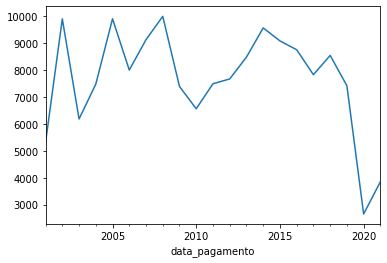

In [309]:
arrecadacao_unicos.resample('Y', on='data_pagamento').size().plot()


In [310]:
arrecadacao_unicos.resample('Y', on='data_pagamento').size()

data_pagamento
2001-12-31    5320
2002-12-31    9904
2003-12-31    6184
2004-12-31    7479
2005-12-31    9906
2006-12-31    8003
2007-12-31    9131
2008-12-31    9998
2009-12-31    7392
2010-12-31    6564
2011-12-31    7494
2012-12-31    7672
2013-12-31    8483
2014-12-31    9568
2015-12-31    9085
2016-12-31    8757
2017-12-31    7829
2018-12-31    8547
2019-12-31    7420
2020-12-31    2654
2021-12-31    3852
Freq: A-DEC, dtype: int64

In [ ]:
# going back to arrecadacao (including duplicates)
# calculating paid fines
# transforming , into .

arrecadacao.valor_pago = arrecadacao.valor_pago.str.replace(',', '.')
arrecadacao.valor_pago = arrecadacao.valor_pago.astype(float)

arrecadacao.info()

In [312]:
pd.set_option('display.max_columns', None)
arrecadacao.sort_values('valor_pago', ascending=False).head(50)

,n_ai,nome_ou_razao_social,cpf_cnpj,uf,municipio,status_débito,tipo_auto,tipo_infracao,enquadramento_legal,data_auto,valor_do_auto,moeda,parcela,quantidade_de_parcelas,valor_base_da_parcela,valor_pago,data_pagamento,ultima_atualizacao_relatorio,ano_auto,ano_pagamento,anos_para_pagar
23816,683446 - D,PETRO RIO JAGUAR PETRÓLEO LTDA,02.031.413/0001-69,RJ,CAMPOS DOS GOYTACAZES,Quitado. Baixa automática,Multa,Controle ambiental,"Lei 9605/98 - Artigo 70º, Lei 9966/00 - Artigo...",2011-11-21,50000000.00,Real,1,1,50000000,35761950.00,2013-05-07,14/04/2022 19:09,2011,2013,2
27157,682674 - D,VALE S/A,33.592.510/0378-21,MA,SAO PEDRO DA AGUA BRANCA,Quitado. Baixa automática,Multa,Controle ambiental,"Lei 9605/98 - Artigo 70, Decreto 6514/2008 - A...",2013-10-30,22545000.00,Real,1,1,22545000,34567797.60,2014-10-31,14/04/2022 19:05,2013,2014,1
7379,192374 - D,PEDRA AGROINDUSTRIAL S/A,71.304.687/0001-05,SP,SERRANA,Quitado. Baixa automática,Multa,Controle ambiental,"Lei 9605/98 - Artigo 70, Decreto 3179/1999 - A...",2003-10-15,10000000.00,Real,1,1,10000000,23268083.40,2012-02-13,14/04/2022 19:10,2003,2012,9
16464,363451 - D,PETROLEO BRASILEIRO S/A - PETROBRAS,33.000.167/0001-01,RJ,CAMPOS DOS GOYTACAZES,Quitado. Baixa automática,Multa,Controle ambiental,"Lei 9605/98 - Artigo 70, Decreto 6514/2008 - A...",2011-01-28,3000000.00,Real,1,1,3000000,16540200.00,2019-01-11,14/04/2022 19:09,2011,2019,8
24443,571762 - D,VALE S/A,33.592.510/0378-21,MA,SAO LUIS,Quitado. Baixa automática,Multa,Flora,"Lei 9605/98 - Artigo 70, Decreto 6514/2008 - A...",2009-09-18,9234300.00,Real,1,1,9234300,15198014.45,2013-07-22,14/04/2022 19:05,2009,2013,4
19806,510269 - D,PETROLEO BRASILEIRO S/A - PETROBRAS,33.000.167/0001-01,RJ,MACAE,Quitado por conversão de renda,Multa,Controle ambiental,"Lei 9605/98 - Artigo 70, Decreto 6514/2008 - A...",2008-08-14,2100000.00,Real,1,1,2100000,13133129.31,2021-11-05,14/04/2022 19:09,2008,2021,13
23628,633093 - D,PETROBRAS - PETROLEO BRASILEIRO S.A.,33.000.167/1007-50,RJ,CAMPOS DOS GOYTACAZES,Quitado. Baixa automática,Multa,Controle ambiental,"Lei 9605/98 - Artigo 70, Decreto 6514/2008 - A...",2011-03-24,1800000.00,Real,1,1,1800000,10894613.40,2020-03-25,14/04/2022 19:09,2011,2020,9
22733,494119 - D,COMPANHIA DE SANEAMENTO DO PARANÁ - SANEPAR,76.484.013/0001-45,PR,CURITIBA,Exigibilidade suspensa por dec. judic. sem dep...,Multa,Controle ambiental,"Lei 9605/98 - Artigo 70, Decreto 6514/2008 - A...",2008-01-12,46000.00,Real,1,1,46000,10316419.60,2017-12-28,14/04/2022 19:08,2008,2017,9
22816,494120 - D,COMPANHIA DE SANEAMENTO DO PARANÁ - SANEPAR,76.484.013/0001-45,PR,CURITIBA,Exigibilidade suspensa por dec. judic. sem dep...,Multa,Controle ambiental,"Lei 9605/98 - Artigo 70, Decreto 6514/2008 - A...",2008-01-12,44500.00,Real,1,1,44500,10316419.43,2017-12-28,14/04/2022 19:08,2008,2017,9
38861,89278 - D,ADMINISTRAÇÃO DOS PORTOS DE PARANAGUÁ E ANTONINA,79.621.439/0001-91,PR,PARANAGUA,Quitado por conversão de renda,Multa,Controle ambiental,"Lei 9605/98 - Artigo 70, Decreto 6514/2008 - A...",2009-08-26,1000000.00,Real,1,1,1000000,7687960.49,2020-10-08,14/04/2022 19:08,2009,2020,11


In [313]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)


arrecadacao.valor_pago.describe()

count    1091723.00000
mean        1424.08593
std        64043.56276
min            0.00000
25%          117.37000
50%          241.33000
75%          630.00000
max     35761950.00000
Name: valor_pago, dtype: float64

In [317]:
arrecadacao[arrecadacao.ano_pagamento == 2021].valor_pago.describe()

count      63810.00000
mean        2300.26640
std        59988.72817
min            0.10000
25%          164.35000
50%          319.29000
75%          830.31250
max     13133129.31000
Name: valor_pago, dtype: float64

In [314]:
arrecadacao_por_ano = arrecadacao.groupby('ano_pagamento').valor_pago.sum().reset_index()
arrecadacao_por_ano


,ano_pagamento,valor_pago
0,2001,5725439.52000
1,2002,10805883.31000
2,2003,11223356.71000
3,2004,14484876.47000
4,2005,20154463.25000
5,2006,23966070.77000
6,2007,32440735.85000
7,2008,47265971.72000
8,2009,43009695.45000
9,2010,41927642.04000


# Let's compare how much was charged and how much was actually paid in fines by year

In [315]:
arrecadacao_por_ano.to_csv('arrecadacao_por_ano_com_multas')

In [339]:
multas_aplicadas_e_cobradas = arrecadacao_por_ano.merge(valor_multas_aplicadas_por_ano, left_on='ano_pagamento', right_on='ano')
multas_aplicadas_e_cobradas['paid_pct'] = multas_aplicadas_e_cobradas.valor_pago / multas_aplicadas_e_cobradas.valor_multa


multas_aplicadas_e_cobradas.to_csv('multas_aplicadas_e_cobradas.csv')
multas_aplicadas_e_cobradas


,ano_pagamento,valor_pago,ano,valor_multa,paid_pct
0,2001,5725439.52000,2001,597443016.39000,0.00958
1,2002,10805883.31000,2002,723296915.23000,0.01494
2,2003,11223356.71000,2003,596315925.84000,0.01882
3,2004,14484876.47000,2004,886142631.21000,0.01635
4,2005,20154463.25000,2005,2215028360.57000,0.00910
5,2006,23966070.77000,2006,1562708730.50000,0.01534
6,2007,32440735.85000,2007,2155313318.72000,0.01505
7,2008,47265971.72000,2008,3939070236.86000,0.01200
8,2009,43009695.45000,2009,3422994191.64000,0.01256
9,2010,41927642.04000,2010,2617591473.21001,0.01602


In [337]:
arrecadacao[arrecadacao.ano_pagamento == 2021].valor_pago.describe()

count      63810.00000
mean        2300.26640
std        59988.72817
min            0.10000
25%          164.35000
50%          319.29000
75%          830.31250
max     13133129.31000
Name: valor_pago, dtype: float64